# CME 193 Spring 2018
## Lecture 7 Supplement

## More pandas
### Example: CO2 PPM since 1980

Using the data from this blog post:

[Carbon Dioxide Increased at the Highest Rate on Record in 2016](co2)

[co2]: http://www.newsindata.com/home/2017/1/7/carbon-dioxide-increased-at-the-highest-rate-on-record-in-2016

Incidentally, it features an awesome plot that was coded in Javascript using a pickage called HighCharts.

In [8]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={"figure.figsize": (20, 7), "lines.linewidth": 2.5}, font_scale=1.5)
sns.set_style("whitegrid")
np.random.seed(0)

#### Reading a text file from a HTTP endpoint

In [10]:
df = pd.read_table('https://stanford.edu/~jacobp2/src/materials/nb/data/co2_mm_gl.txt', delim_whitespace=True, comment='#')

In [11]:
pd.set_option('display.max_rows', 10)
df

,year,month,decimal,average,trend
0,1980,1,1980.042,338.45,337.82
1,1980,2,1980.125,339.14,338.10
2,1980,3,1980.208,339.46,338.12
3,1980,4,1980.292,339.86,338.24
4,1980,5,1980.375,340.30,338.77
...,...,...,...,...,...
437,2016,6,2016.458,403.35,402.83
438,2016,7,2016.542,401.85,403.23
439,2016,8,2016.625,400.55,403.34
440,2016,9,2016.708,400.68,403.39


In [12]:
orig = df.copy()

### Pandas method for true copy : ```pd.DataFrame.copy```

In [13]:
# Set do be the first day of the month
df['day'] = 1
# make 
dates = pd.to_datetime(df[['month', 'day', 'year']])
dates

0     1980-01-01
1     1980-02-01
2     1980-03-01
3     1980-04-01
4     1980-05-01
         ...    
437   2016-06-01
438   2016-07-01
439   2016-08-01
440   2016-09-01
441   2016-10-01
Length: 442, dtype: datetime64[ns]

In [14]:
df['date'] = dates

In [16]:
df = df.set_index('date')

In [17]:
df

,year,month,decimal,average,trend,day
date,,,,,,
1980-01-01,1980,1,1980.042,338.45,337.82,1
1980-02-01,1980,2,1980.125,339.14,338.10,1
1980-03-01,1980,3,1980.208,339.46,338.12,1
1980-04-01,1980,4,1980.292,339.86,338.24,1
1980-05-01,1980,5,1980.375,340.30,338.77,1
...,...,...,...,...,...,...
2016-06-01,2016,6,2016.458,403.35,402.83,1
2016-07-01,2016,7,2016.542,401.85,403.23,1
2016-08-01,2016,8,2016.625,400.55,403.34,1


In [18]:
# df.index = dates
df.drop(df[['month', 'day', 'year', 'decimal']], axis=1, inplace=True)
df

,average,trend
date,,
1980-01-01,338.45,337.82
1980-02-01,339.14,338.10
1980-03-01,339.46,338.12
1980-04-01,339.86,338.24
1980-05-01,340.30,338.77
...,...,...
2016-06-01,403.35,402.83
2016-07-01,401.85,403.23
2016-08-01,400.55,403.34


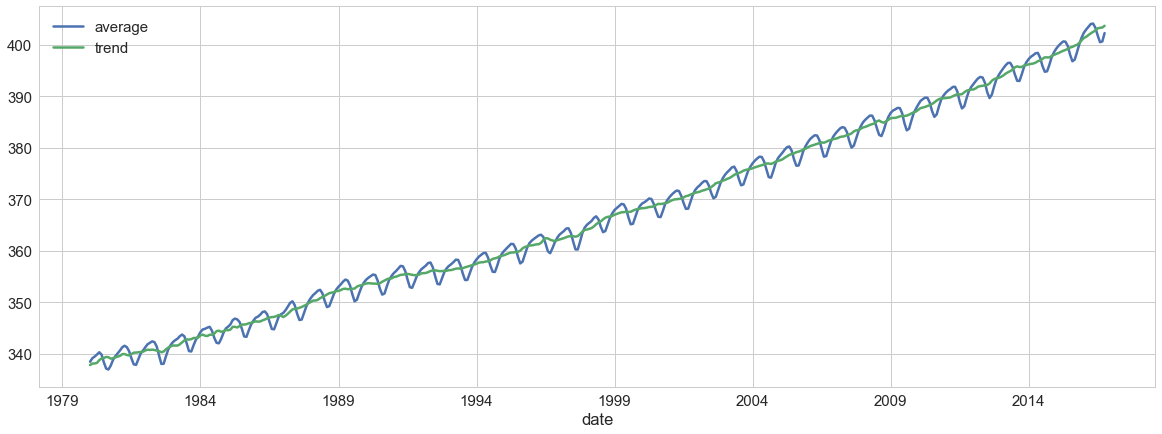

In [20]:
df.plot()

# Creating a new DataFrame with rows that meet condition

In [21]:
recent = df.loc['2007':, ]

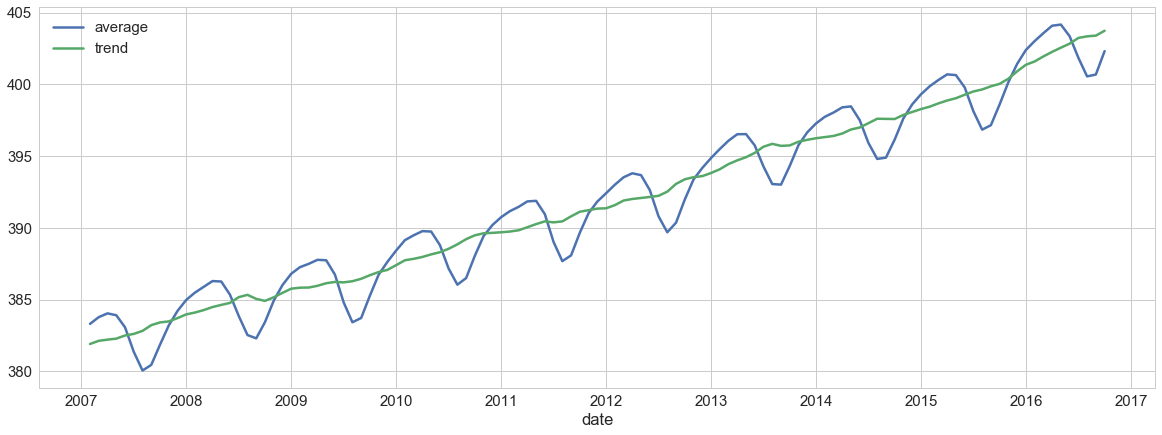

In [23]:
recent = df[df.index > '2007']
_ = recent.plot()

#### Examples of how one may 'quickly' explore a frame

In [24]:
old = df[df.index < '1990']
old

,average,trend
date,,
1980-01-01,338.45,337.82
1980-02-01,339.14,338.10
1980-03-01,339.46,338.12
1980-04-01,339.86,338.24
1980-05-01,340.30,338.77
...,...,...
1989-08-01,350.19,352.68
1989-09-01,350.52,353.05
1989-10-01,351.81,353.24


# How can we do the same thing with .loc?

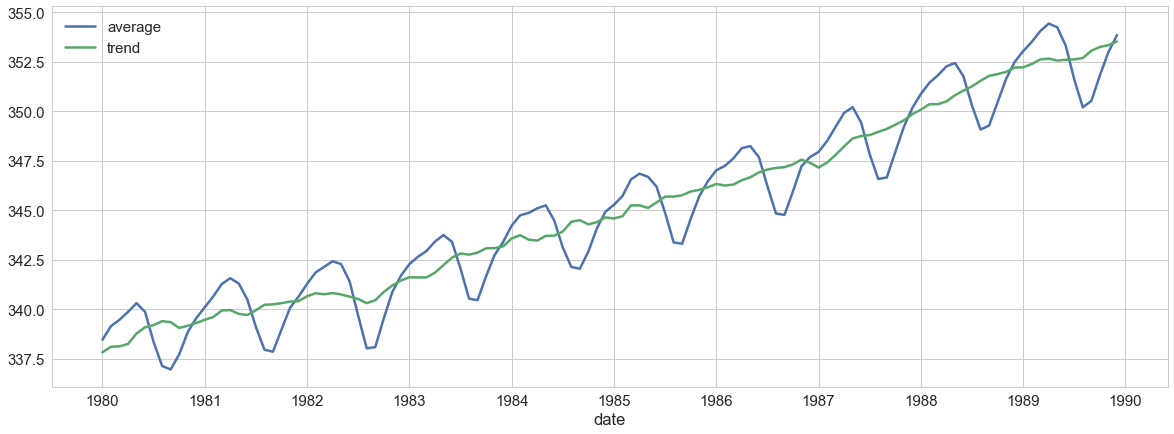

In [25]:
old.plot()

##### At this point, by inspection, you might be convinced there is further analysis to be done

In [26]:
np.var(old['average']), np.var(recent['average'])

(21.86439327083335, 39.14765706771859)

### Some Seaborn plots - 
##### Definitely not perfect, just examples of how you might quickly explore a dataset

In [32]:
# Define the different seasons by month of the year
first = [1,2,3]
second = [4,5,6]
third = [7,8,9]
fourth = [10,11,12]

In [33]:
orig = orig.query('year > 2000 and year < 2016')
orig

,year,month,decimal,average,trend
252,2001,1,2001.042,370.51,369.62
253,2001,2,2001.125,371.00,369.84
254,2001,3,2001.208,371.40,369.99
255,2001,4,2001.292,371.72,370.05
256,2001,5,2001.375,371.62,370.09
...,...,...,...,...,...
427,2015,8,2015.625,396.84,399.64
428,2015,9,2015.708,397.15,399.86
429,2015,10,2015.792,398.60,400.03
430,2015,11,2015.875,400.15,400.39


#### Seaborn color palettes
http://seaborn.pydata.org/tutorial/color_palettes.html

In [34]:
sns.set_palette("husl")

In [35]:
# Get the unique years
list(orig['year'].unique())

[2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [36]:
years_ = list(orig['year'].unique())
N = len(years_)
print(N)

15


In [37]:
def plot_group(group, months, ax = None):
    if ax: 
        sns.distplot(group['average'], ax=ax,label=str(group['year'].iloc[0]))
    else:
        plt.figure()
        ax = sns.distplot(group['average'],label=str(group['year'].iloc[0]))
    ax.legend()
    plt.title('Distribution of yearly CO2 PPM, Months {} 1980-2016'.format(months))
    return group['average']

In [38]:
first_months = orig[orig['month'].isin(first)]
first_months

,year,month,decimal,average,trend
252,2001,1,2001.042,370.51,369.62
253,2001,2,2001.125,371.00,369.84
254,2001,3,2001.208,371.40,369.99
264,2002,1,2002.042,372.34,371.38
265,2002,2,2002.125,372.73,371.49
...,...,...,...,...,...
409,2014,2,2014.125,397.73,396.32
410,2014,3,2014.208,398.03,396.40
420,2015,1,2015.042,399.30,398.27
421,2015,2,2015.125,399.86,398.44


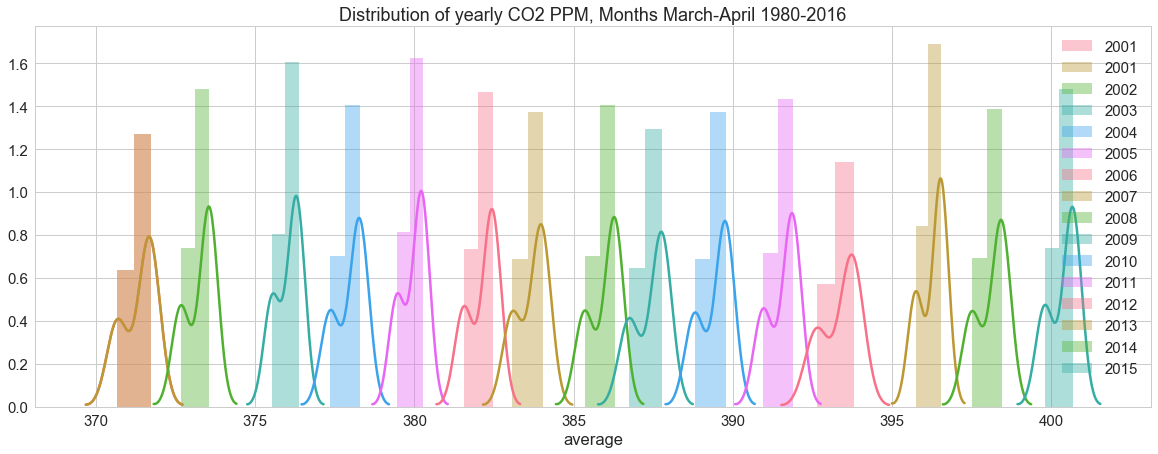

In [39]:
fig, ax = plt.subplots()
second_months = orig[orig['month'].isin(second)]
tmp = second_months.groupby('year').apply(lambda x: plot_group(x, "March-April", ax=ax)).unstack()

     year
252  2001    370.51
     2002       NaN
     2003       NaN
     2004       NaN
     2005       NaN
              ...  
422  2011       NaN
     2012       NaN
     2013       NaN
     2014       NaN
     2015    400.30
Length: 675, dtype: float64

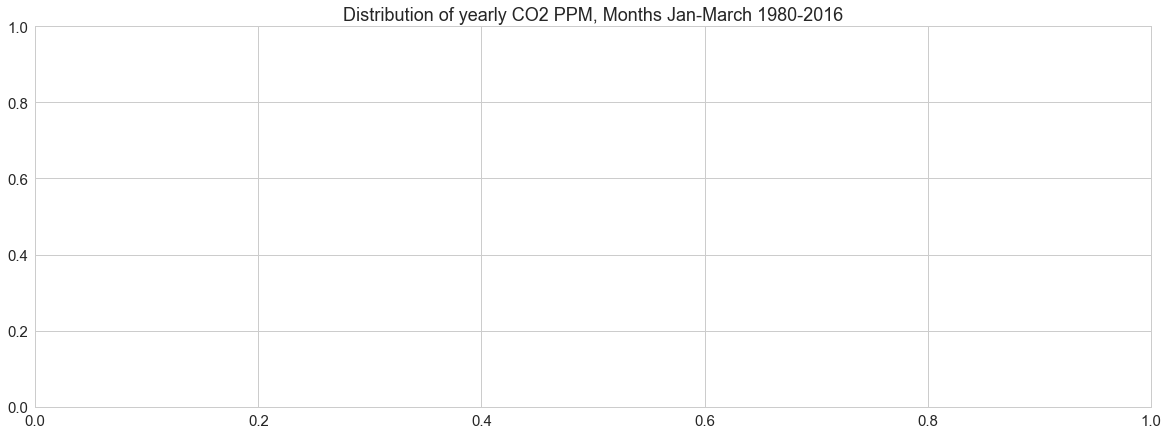

In [48]:
tmp = first_months.groupby('year').apply(lambda x: plot_group(x, "Jan-March", ax=ax))
tmp.unstack()

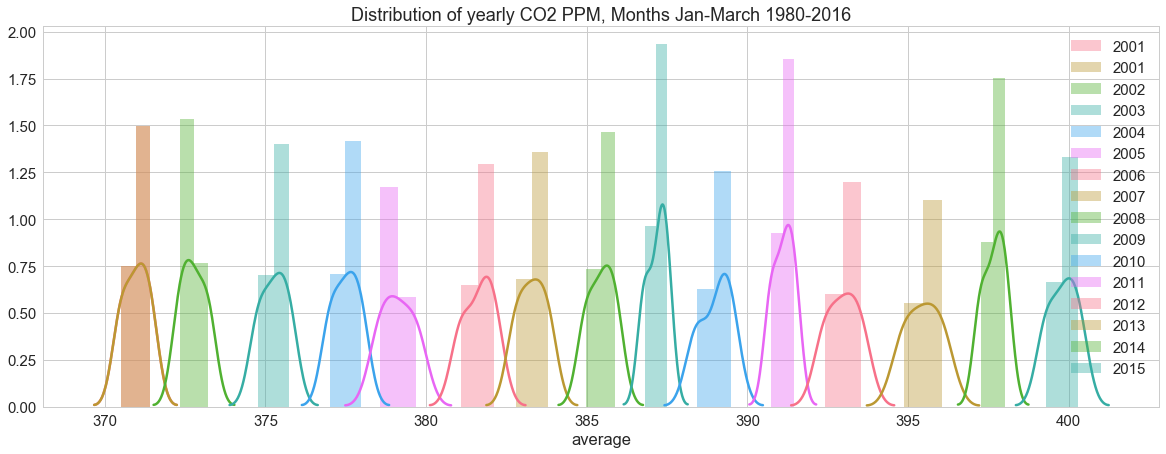

In [40]:
fig, ax = plt.subplots()
tmp = first_months.groupby('year').apply(lambda x: plot_group(x, "Jan-March", ax=ax)).unstack()

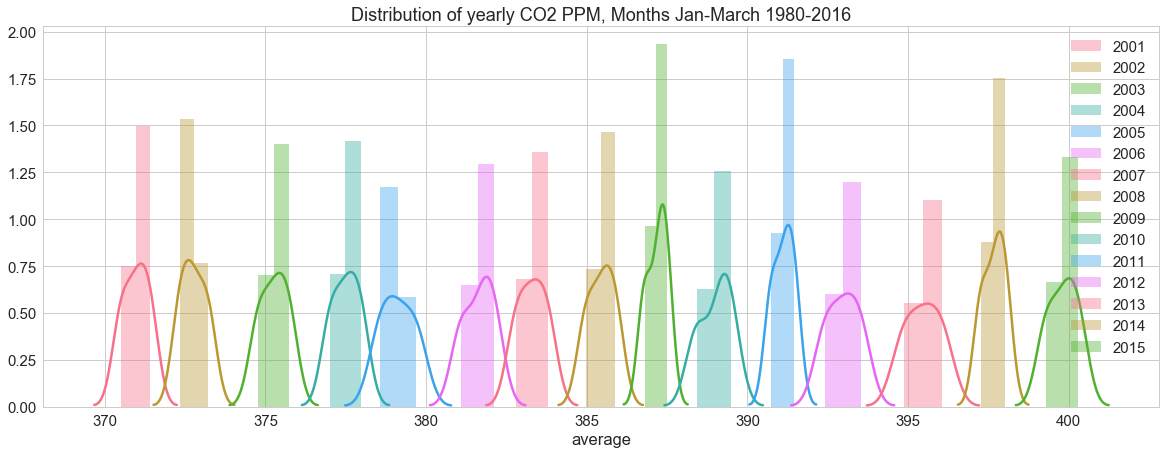

In [41]:
#BADDD
N = len(orig)
for i, k in enumerate(years_):
    frame = orig.query("month in @first and year == @k")
    ax = sns.distplot(frame['average'], label=str(k))
    ax.legend()
    #plt.show()
    #plt.figure()
    plt.title('Distribution of yearly CO2 PPM, Months Jan-March 1980-2016')

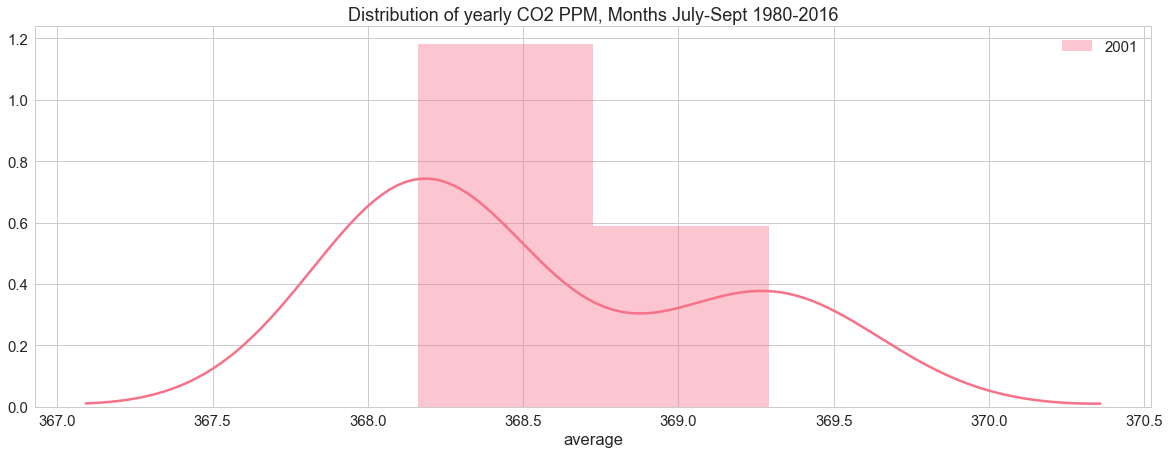

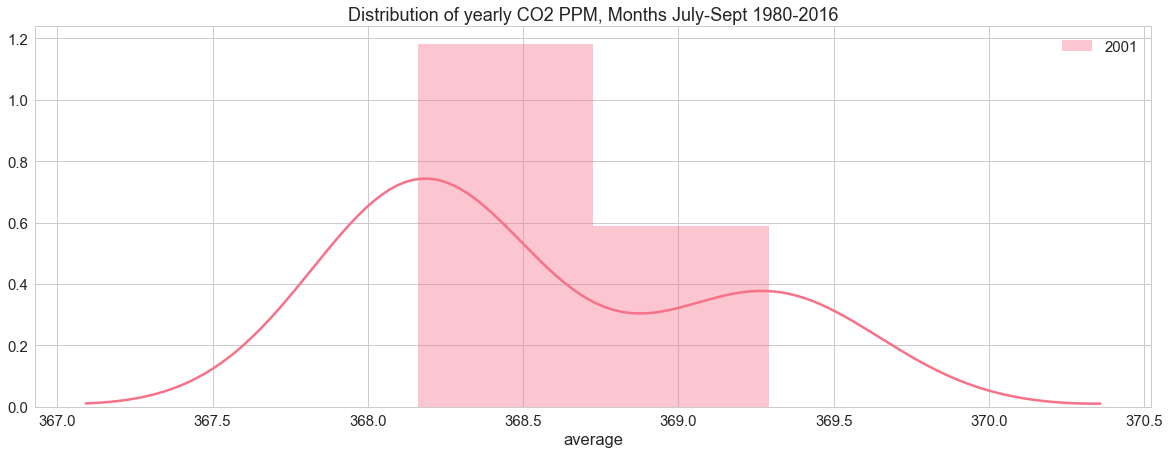

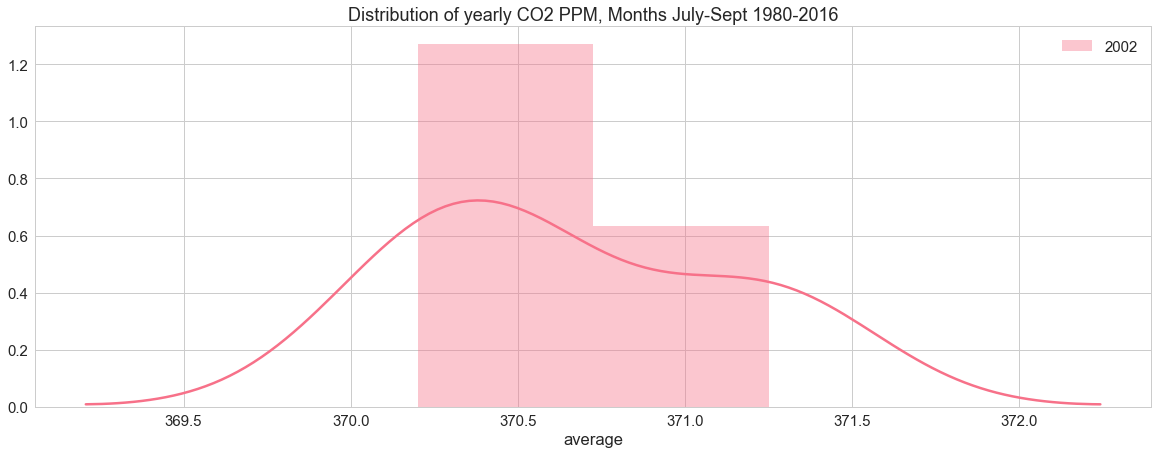

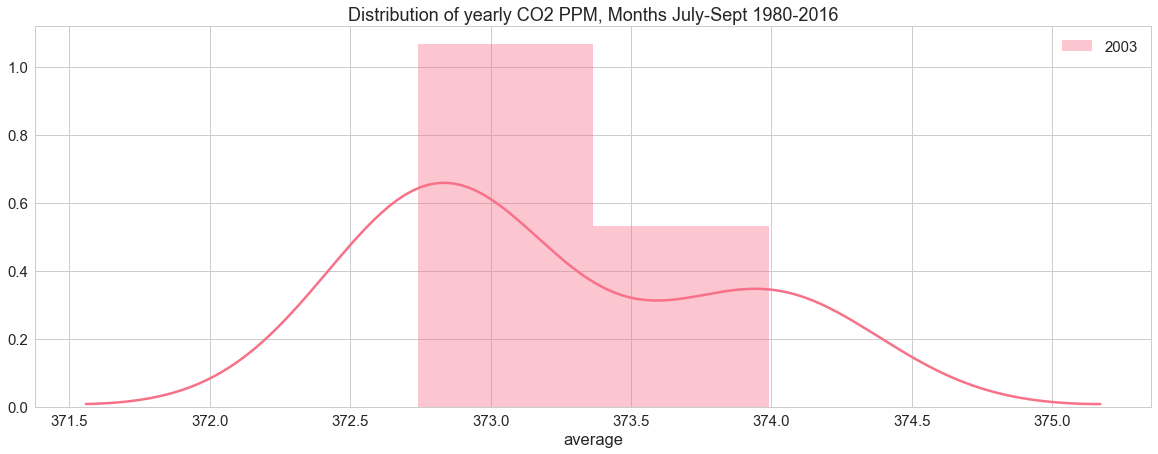

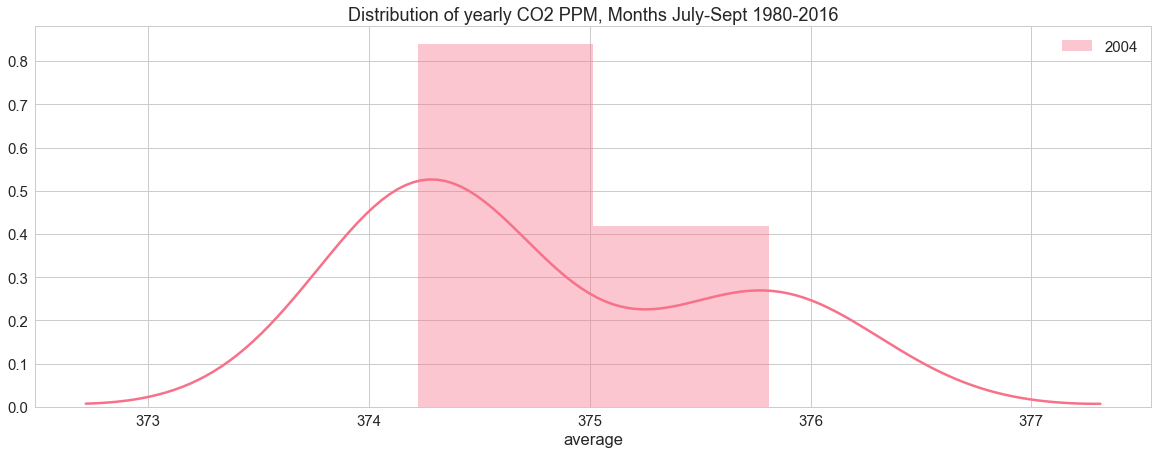

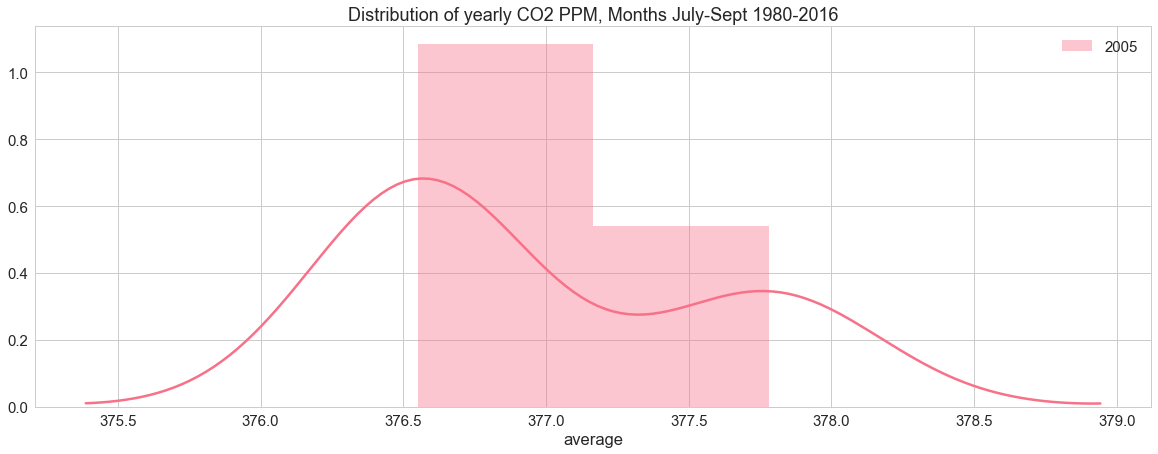

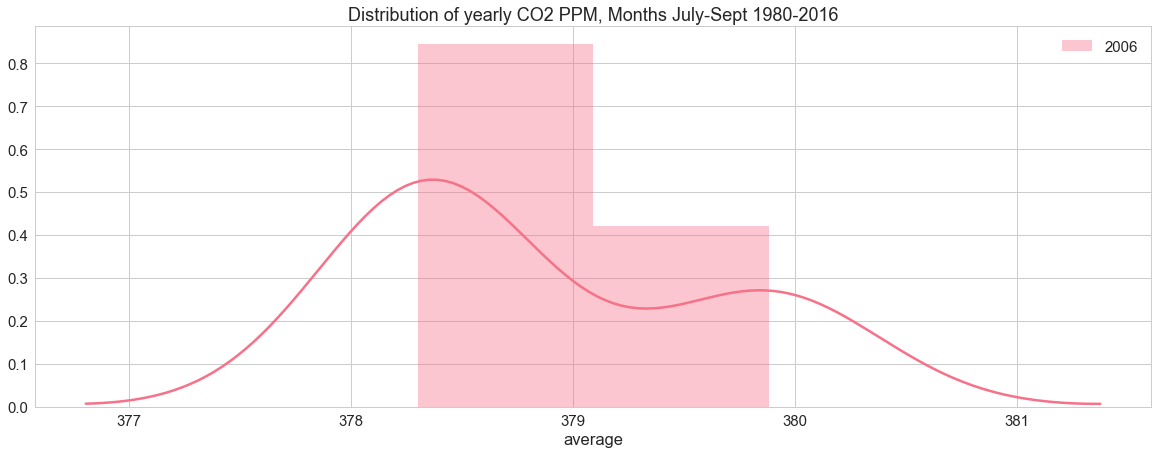

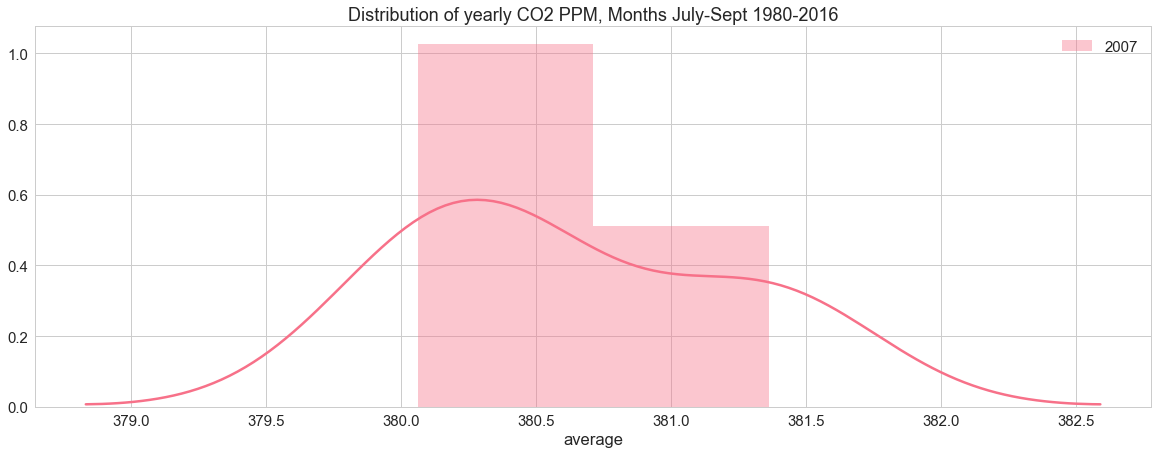

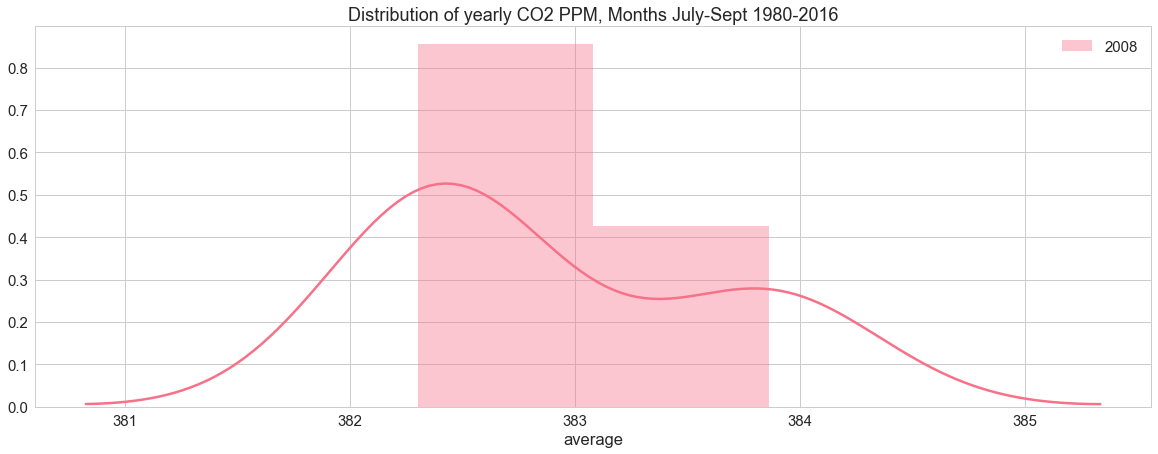

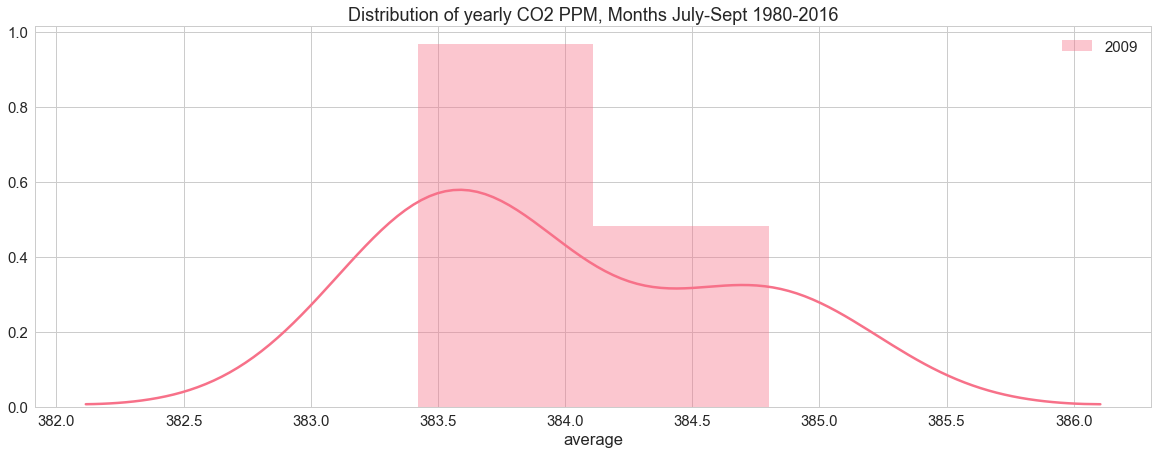

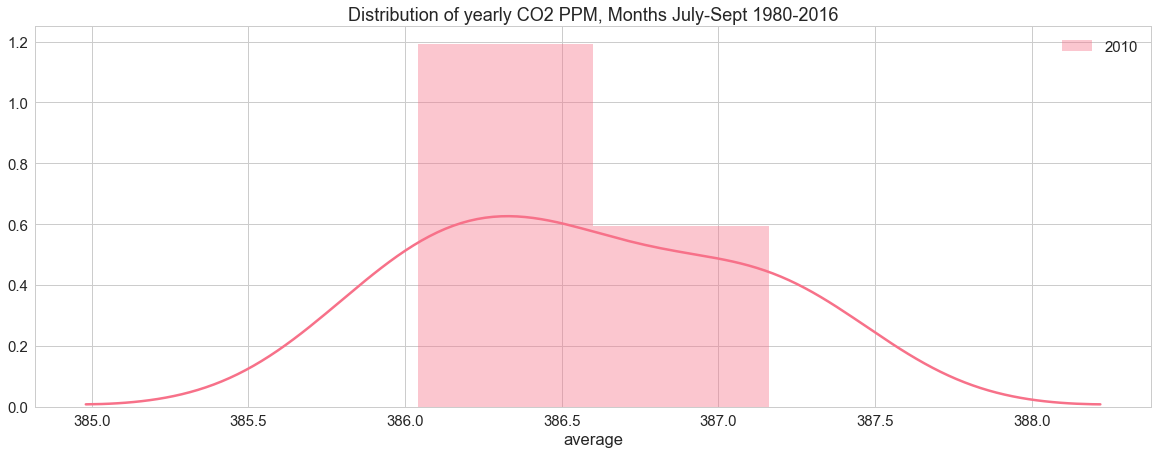

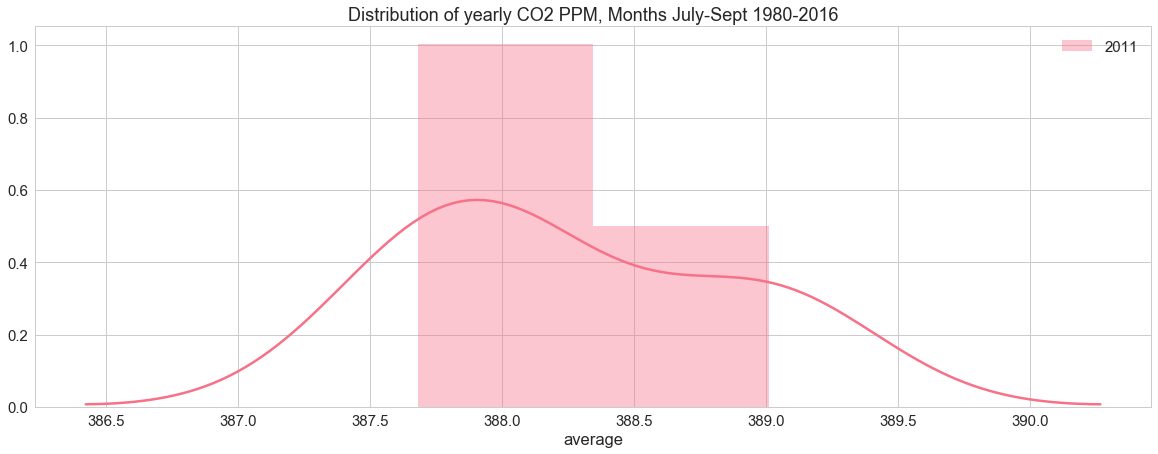

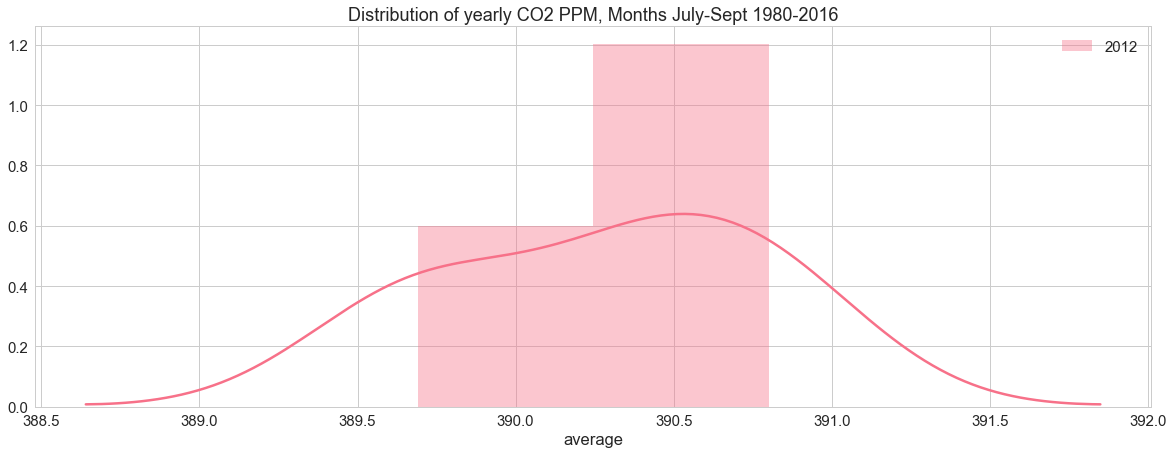

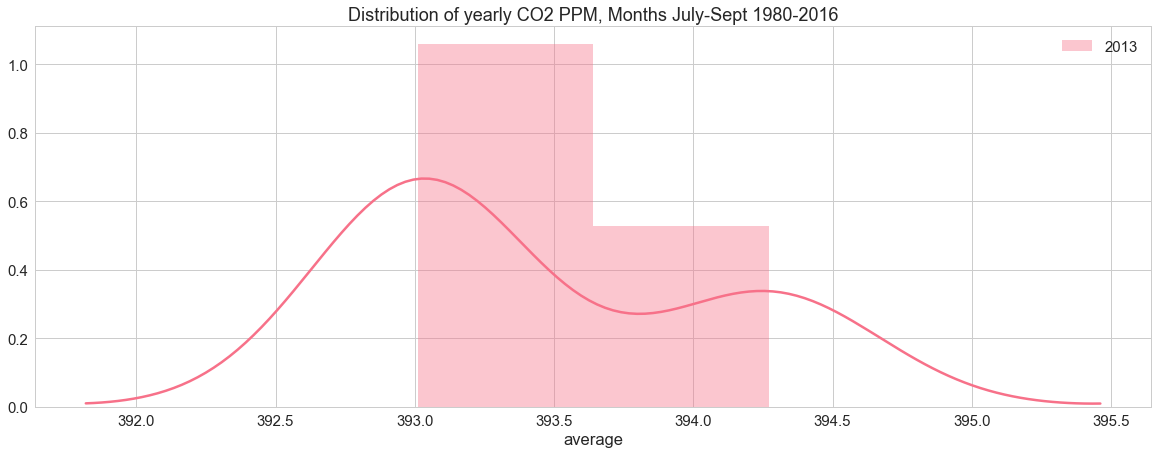

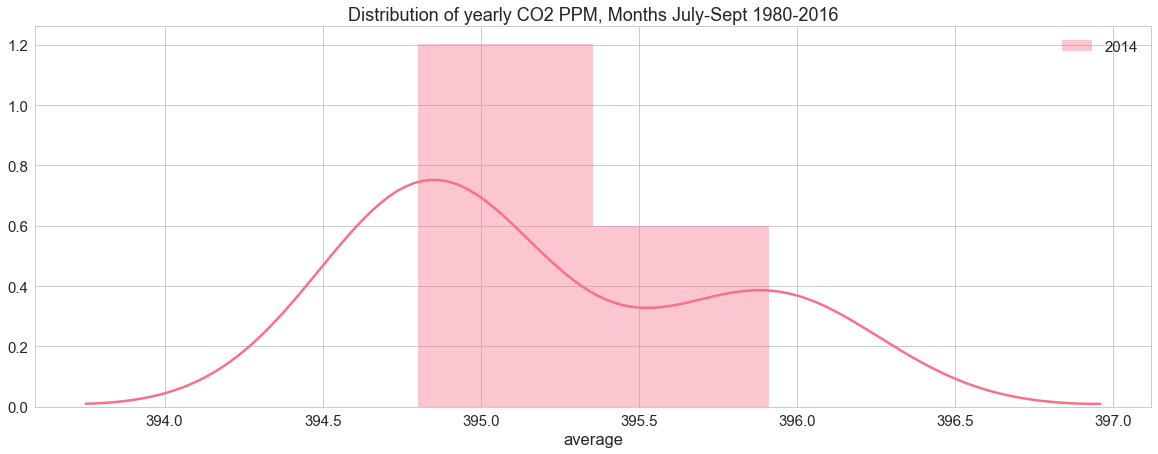

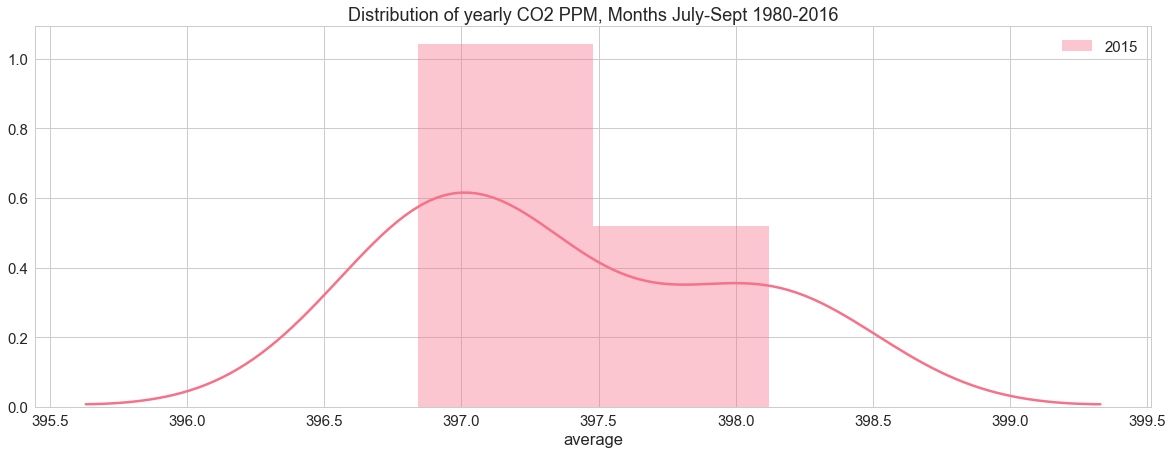

In [33]:
tmp = orig[orig['month'].isin(third)].groupby('year').apply(lambda x: plot_group(x, "July-Sept")).unstack()

--------------------------------